In [1]:
import wandb

# fenics Finite Element
from fenics import *
from mshr import *
from dolfin import *

import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# typical libaries
import numpy as np
import matplotlib.pyplot as plt

#% matplotlib notebook
# from IPython.display import Image
# from IPython.display import set_matplotlib_formats
# from IPython.display import clear_output
# set_matplotlib_formats('png', 'pdf')
# get_ipython().run_line_magic('matplotlib', 'inline')

import gym
from gym import spaces

from wandb.integration.sb3 import WandbCallback

from tqdm import tqdm
from PINN_3D import PINN
from pyDOE import lhs         #Hypercube Sampling
import scipy.io


cuda


In [2]:
from wrapper import PINN_env

from environment import heat_diffusion
r = str(np.random.random())[2:8]

print(r)
sensor_coords = np.array([[0.1, -0.9],[0.9,0.9],[0.5,0.45]])
env1 = heat_diffusion(dt = 1e-1, sensor_coords = sensor_coords,
                     continuous = True,
                     noisy_IC = False,
                     norm_reward = False,
                     scale_reward = True,
                     verbose = True,
                     noisy_source = False,
                     wandb_name = f'standard_vpg_{r}_noNoise_maxobs_nodisbcs',
                     project_name = 'Diffusion_Cont_final')


env_pinn = PINN_env(env1, norm_obs = True,
                    standardize_obs = False,
                    discrete_bc = False, #False
                    mean_obs = False,
                   use_wandb=True,
                   max_loss = 100,
                   min_delta = 1.0,
                   max_iter = 20)


411464


wandb: Currently logged in as: jacob-turner (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


/home/jacob/.local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
0it [00:00, ?it/s]
0it [00:00, ?it/s]

In [3]:
from tensorforce.environments import Environment
import tensorforce

env = Environment.create(
    environment=env1)#, max_epsisode_timesteps = 200)



import tensorforce
from tensorforce.agents import Agent



vpg = Agent.create(agent = 'vpg', environment = env,
        max_episode_timesteps = 200, batch_size = 5,
        # Network
        network='auto', use_beta_distribution=False,
        # Memory
        memory='minimum',
        # Optimization
        update_frequency=5, learning_rate=1e-4,
        # Preprocessing
        state_preprocessing='linear_normalization', reward_preprocessing=None,
        # Exploration
        exploration=0.1, variable_noise=0.0,
        # Regularization
        #l2_regularization=0, entropy_regularization=0
        )


In [4]:
from tensorforce.execution import Runner

runner = Runner(
    agent=vpg,
    environment=env
)

In [5]:
runner.run(num_episodes=400) #memory issues

Episodes:   0%|          | 0/400 [00:00, return=0.00, ts/ep=0, sec/ep=0.00, ms/ts=0.0, agent=0.0%]

199it [00:23, 11.94it/s]

Episode Reward:  -1381.2156517106914


399it [00:42, 10.38it/s]

Episode Reward:  -1018.7386328085496


600it [01:01,  8.74it/s]

Episode Reward:  -1051.267392254299


800it [01:21, 11.91it/s]

Episode Reward:  -913.4769513795073


1000it [01:38, 11.39it/s]

Episode Reward:  -1377.7261194612015


1200it [01:55, 11.16it/s]

Episode Reward:  -755.8323441258167


1400it [02:13, 11.94it/s]

Episode Reward:  -1092.1289422071716


1599it [02:31, 12.21it/s]

Episode Reward:  -958.9745544740667


1801it [02:48, 10.13it/s]

Episode Reward:  -906.5879984198018


1999it [03:04, 12.28it/s]

Episode Reward:  -922.8767860823314


2201it [03:21, 10.04it/s]

Episode Reward:  -636.2783655866253


2401it [03:37, 10.19it/s]

Episode Reward:  -881.5910063312042


2601it [03:54,  9.90it/s]

Episode Reward:  -664.1723823199011


2799it [04:10, 12.38it/s]

Episode Reward:  -738.7393352031978


3001it [04:27, 10.06it/s]

Episode Reward:  -788.8651056709032


3201it [04:43, 10.11it/s]

Episode Reward:  -684.0192386404428


3401it [05:00,  9.97it/s]

Episode Reward:  -618.140869743564


3601it [05:16, 10.12it/s]

Episode Reward:  -638.6373914374002


3799it [05:32, 10.94it/s]

Episode Reward:  -589.3225419505233


3999it [05:51, 10.99it/s]

Episode Reward:  -861.3796168869328


4199it [06:10, 10.97it/s]

Episode Reward:  -618.4430863944718


4399it [06:28, 10.74it/s]

Episode Reward:  -565.2672463354643


4600it [06:49, 10.72it/s]

Episode Reward:  -817.861098919311


4799it [07:08, 10.39it/s]

Episode Reward:  -569.514950451331


4999it [07:26, 10.82it/s]

Episode Reward:  -588.0536351702976


5200it [07:45, 10.24it/s]

Episode Reward:  -674.8369339568319


5400it [08:04, 10.88it/s]

Episode Reward:  -675.3903485875095


5600it [08:23, 10.79it/s]

Episode Reward:  -648.7216350293879


5800it [08:41, 10.77it/s]

Episode Reward:  -700.7124438158909


6000it [09:00, 10.99it/s]

Episode Reward:  -626.7266123155662


6200it [09:18, 10.85it/s]

Episode Reward:  -718.2475528613472


6400it [09:37, 11.02it/s]

Episode Reward:  -647.3596786127587


6600it [09:56, 10.81it/s]

Episode Reward:  -566.2599859589267


6800it [10:14, 10.78it/s]

Episode Reward:  -610.757971083392


7000it [10:33, 10.70it/s]

Episode Reward:  -698.2258112795067


7200it [10:51, 10.93it/s]

Episode Reward:  -543.0238000499364


7400it [11:12,  9.34it/s]

Episode Reward:  -505.15205444849045


7599it [11:30, 10.79it/s]

Episode Reward:  -557.9156761197344


7799it [11:49, 10.76it/s]

Episode Reward:  -523.8408679880207


8000it [12:08, 10.78it/s]

Episode Reward:  -548.3858888219031


8200it [12:26, 10.67it/s]

Episode Reward:  -524.8208194078975


8400it [12:45, 10.79it/s]

Episode Reward:  -416.78257246257795


8599it [13:03, 10.88it/s]

Episode Reward:  -559.033510882981


8799it [13:22, 10.72it/s]

Episode Reward:  -713.7129211366405


9000it [13:41, 10.71it/s]

Episode Reward:  -517.1715555849163


9200it [13:59, 10.91it/s]

Episode Reward:  -473.056807852813


9400it [14:18, 10.90it/s]

Episode Reward:  -626.0761246182251


9600it [14:37, 10.89it/s]

Episode Reward:  -571.234132387374


9800it [14:55, 10.85it/s]

Episode Reward:  -532.716662308106


9999it [15:14, 10.55it/s]

Episode Reward:  -528.7916484867949


10199it [15:32, 10.93it/s]

Episode Reward:  -469.47122915925183


10399it [15:51, 10.94it/s]

Episode Reward:  -472.0453737789771


10600it [16:10, 10.83it/s]

Episode Reward:  -480.13128193600403


10800it [16:29, 10.82it/s]

Episode Reward:  -466.50177576938916


10999it [16:47, 11.06it/s]

Episode Reward:  -479.97548801917856


11199it [17:06, 10.84it/s]

Episode Reward:  -494.7306862751105


11399it [17:24, 10.92it/s]

Episode Reward:  -574.4159837667615


11599it [17:43, 10.83it/s]

Episode Reward:  -520.3947299264578


11800it [18:02, 10.92it/s]

Episode Reward:  -448.2273107398263


12000it [18:21, 11.02it/s]

Episode Reward:  -463.98274105766586


12201it [18:40,  9.24it/s]

Episode Reward:  -514.1209800434715


12400it [18:58, 10.92it/s]

Episode Reward:  -459.68541800626406


12600it [19:15, 12.14it/s]

Episode Reward:  -371.4679376976674


12800it [19:32, 12.26it/s]

Episode Reward:  -436.14687494473924


13000it [19:48, 12.29it/s]

Episode Reward:  -458.91442316665336


13200it [20:05, 11.84it/s]

Episode Reward:  -407.9930530308396


13400it [20:22, 11.55it/s]

Episode Reward:  -323.9306581628462


13600it [20:38, 11.97it/s]

Episode Reward:  -522.8005123894711


13800it [20:55, 12.15it/s]

Episode Reward:  -405.6548944908592


14000it [21:14, 11.89it/s]

Episode Reward:  -476.73598705748225


14200it [21:31, 11.83it/s]

Episode Reward:  -445.94046523174904


14400it [21:48, 11.85it/s]

Episode Reward:  -530.5793791234086


14600it [22:05, 12.13it/s]

Episode Reward:  -479.97691318032213


14800it [22:22, 11.11it/s]

Episode Reward:  -443.46146832044474


15000it [22:39, 10.20it/s]

Episode Reward:  -470.13343388541114


15085it [22:47, 12.11it/s]

KeyboardInterrupt: 

In [6]:
#env_pinn.save_PINN(episode = 150, id = r)

vpg.save(directory = 'models/', 
         filename = f'Standard_vpg_{r}_', 
         append="timesteps")

'models/Standard_vpg_411464_-15086-1'

15085it [23:02, 12.11it/s]

In [6]:
y = torch.stack(env_pinn.info['PINN_loss']).cpu().detach().numpy()

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

y_smooth = smooth(y, 400)

plt.plot(np.arange(len(y)),y_smooth)

RuntimeError: CUDA error: out of memory

KeyboardInterrupt: 

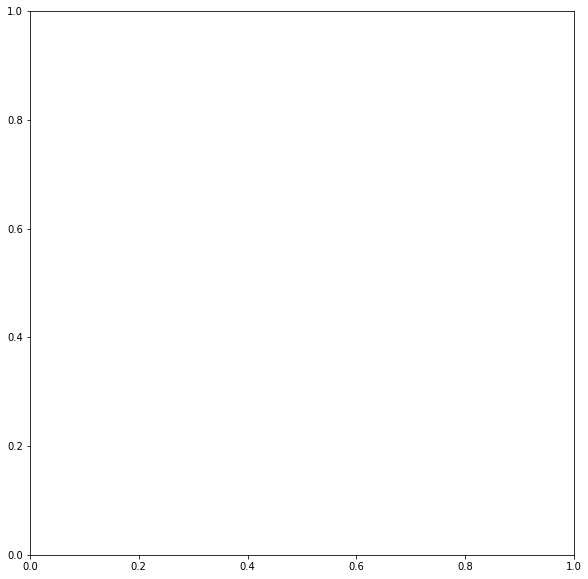

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/jacob/.local/lib/python3.8/site-packages/wandb/sdk/wandb_run.py", line 201, in check_status
    status_response = self._interface.communicate_stop_status()
  File "/home/jacob/.local/lib/python3.8/site-packages/wandb/sdk/interface/interface.py", line 742, in communicate_stop_status
    resp = self._communicate(req, timeout=timeout, local=True)
  File "/home/jacob/.local/lib/python3.8/site-packages/wandb/sdk/interface/interface.py", line 544, in _communicate
    return self._communicate_async(rec, local=local).get(timeout=timeout)
  File "/home/jacob/.local/lib/python3.8/site-packages/wandb/sdk/interface/interface.py", line 549, in _communicate_async
    raise Exception("The wandb backend process has shutdown")
Exception

In [7]:
sum_rewards = 0.0
for _ in range(1):
    states = env.reset()
    internals = a2c.initial_internals()
    terminal = False
    while not terminal:
        actions, internals = a2c.act(
            states=states, internals=internals,
            independent=True, deterministic=True
        )
        states, terminal, reward = env.execute(actions=actions)
        sum_rewards += reward
        env1.render()
        clear_output(wait=True)
print('Mean episode reward:', sum_rewards / 100)

# Close agent and environment
agent.close()
environment.close()

In [ ]:

env_pinn.save_PINN(episode = 150, id = r)

fname = f'models/diffusion_PINN_39000_SAC_fail_{r}.pth'
if True: 
    model.save(fname)
    print('saved.')

In [ ]:
obs = env_pinn.reset(ic_temp = -20)
env_pinn.test_epsisode(env = env_pinn, 
                      render = True, 
                      load_PINN = env_pinn.pinn_model, 
                      model_name = fname, 
                      model = SAC)

In [ ]:
og_reward = np.array(env1.info['reward']).copy()
plt.plot(np.arange(len(og_reward[-200:])), og_reward[-200:])

In [ ]:
#SAC 001358
            gamma = 0.99,
            tau = 0.005,
            learning_starts = 5000,
            buffer_size = 10000,
            batch_size = 1000,
            optimize_memory_usage = True,
            train_freq = 5,
            gradient_steps = 1,
            target_update_interval = 500